# Tutorial 11: Using Machine Learning to Predict Diabetes

TA: Collin Sakal

In [1]:
# Imports

# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Models
from sklearn.svm import SVC                         # Support vector machine (classifier)
from sklearn.ensemble import RandomForestClassifier # Random forest classifier

# Test train split
from sklearn.model_selection import train_test_split

# Evaluation metrics
from sklearn.metrics import accuracy_score

### IMPORTANT!!!

Make sure you **downloaded all files in the "Tutorial-11-Intro-to-ML" folder** for this tutorial. Both the jupyter notebook and the Data.csv file need to be in the same directory (folder) for the code below to work. The .jpg files (pictures) need to be in the same directory (folder) as well.

**Please follow the steps below:**
1. Download the Tutorial 11 Jupyter Notebook and Data.csv file 
2. Place both files in the same folder
3. Open the Jupyter notebook and run the cell below to import the data and make sure there are no errors

## Data description

Recall the data set from the Matplotlib tutorial. The data contain a variety of health metrics on women from one town in the United States. 

In [2]:
# Read in the data set
df = pd.read_csv("Data.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Diabetes
0,6,148,72,35,200,33.6,0.627,50,1
1,1,85,66,29,62,26.6,0.351,31,0
2,8,183,64,32,238,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Aim for this tutorial

The aim for this tutorial is to **develop and evaluate two prediction models for diabetes**. A few things to consider before we begin:

1. The outcome is binary. 1 = Diabetes, 0 = No diabetes. 
2. We will develop models that returns predictions that are 0s and 1s 
3. We can evaluate our models based on accuracy (what proportion of the time the model makes the correct prediction)

## Brief review of developing a machine learning model 

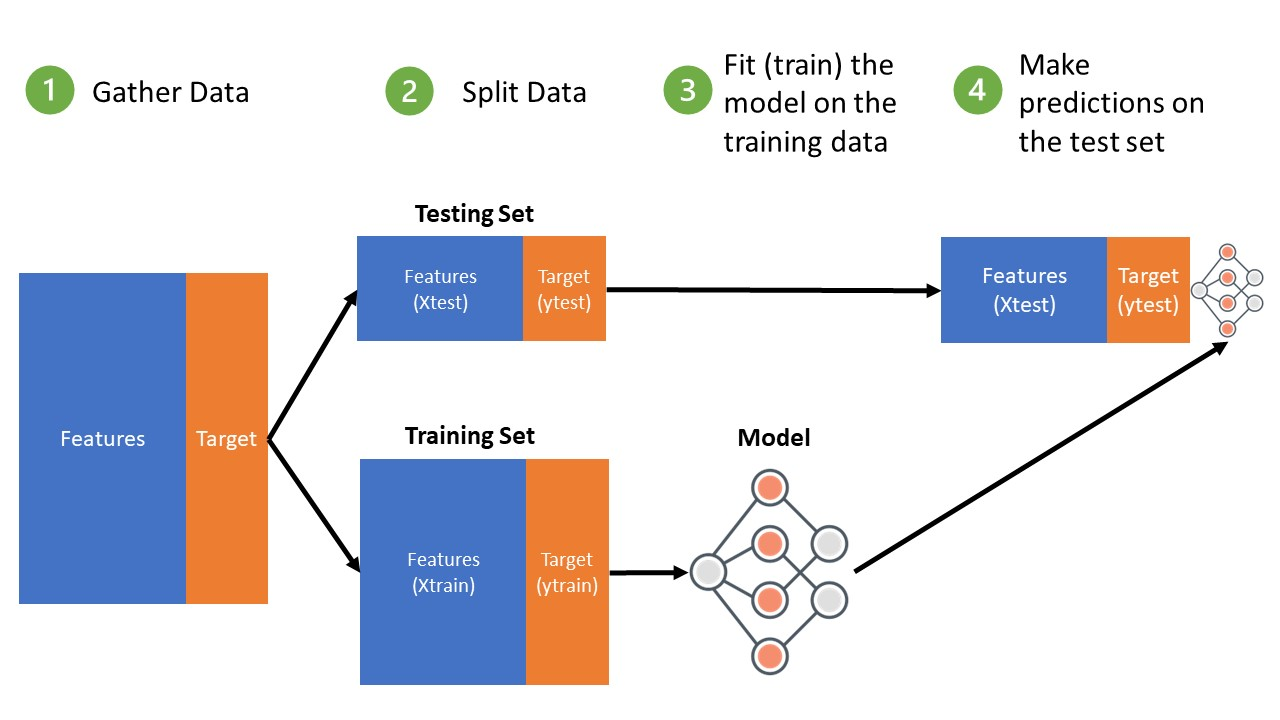

## Evaluating a model based on accuracy

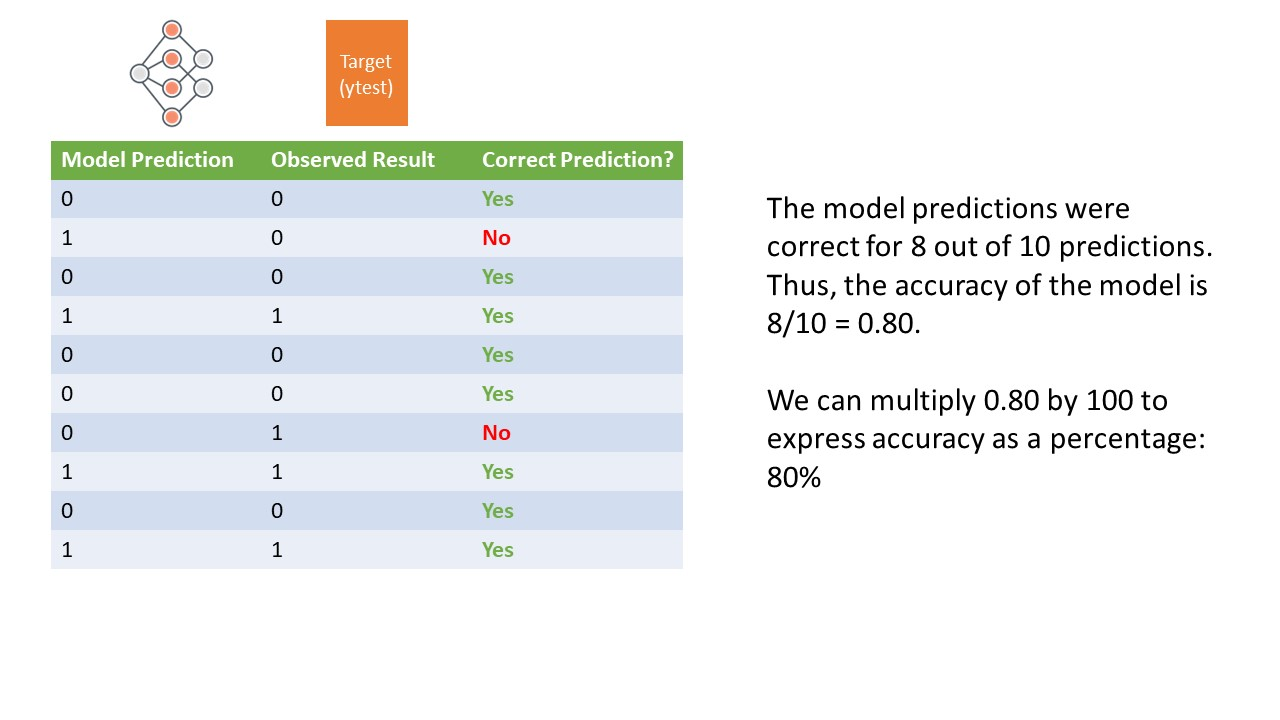

## Hyperparameters and why they're important

Hyperparameters can be thought of as different settings for a model. <br> 

Think of hyperparameters like a volume knob, we can adjust the volume so that a movie is more enjoyable. Similarly, we can adjust model hyperparameters until the model performs better (has better accuracy, for example). <br>

Consider a Random Forest where the hyperparameter is the number of trees. We would want to know what number of trees gives us the best results.

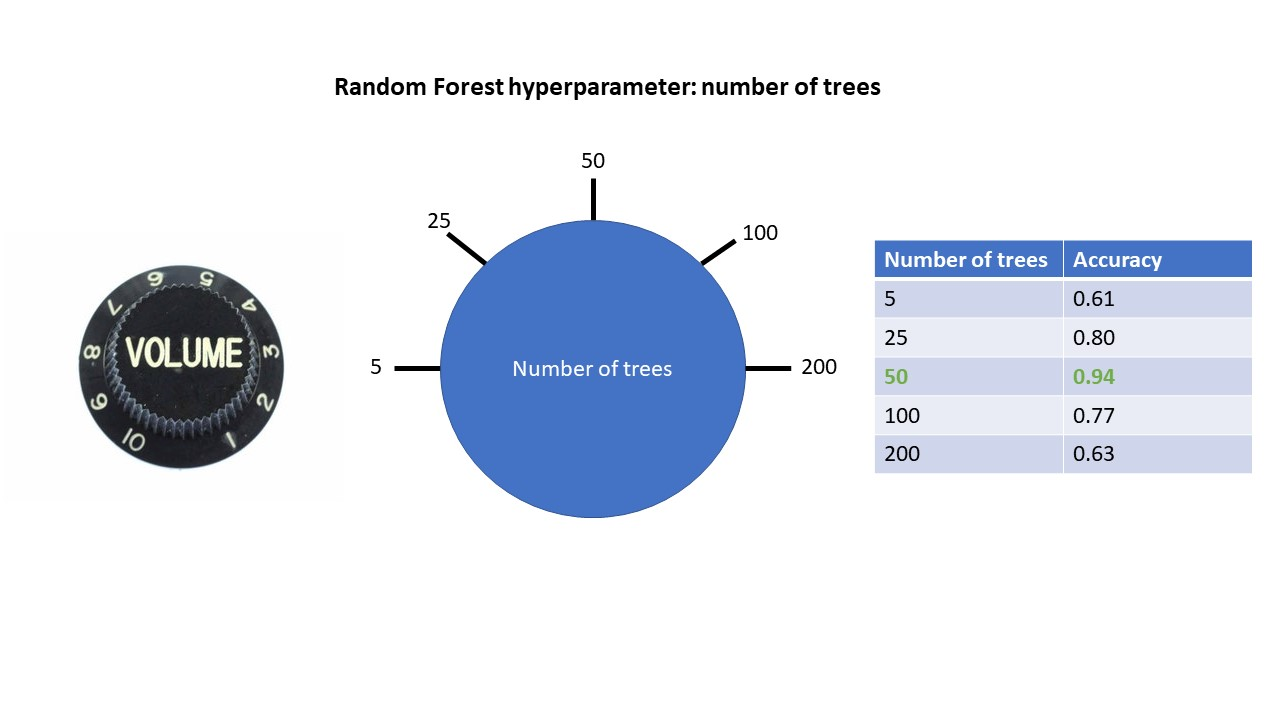

### Reference code for this tutorial

In [ ]:
# Dropping a column from a data set
df.drop('column_name', axis = 1) 

# Selecting a single column
df.loc[:,'column_name'] 

# Test train split
Xtrain, Xtest, ytrain, ytest = train_test_split(feature_matrix, target_vector, random_state = 50)

# Defining a model: support vector machine, and random forest 
svm = SVC(kernel = 'linear', C = 15, random_state = 0)
rf = RandomForestClassifier(n_estimators = 100, random_state = 0)

# Fitting 
model_name.fit(features, target) # note for the random forest about we would use rf.fit(), for the svm we'd use svm.fit()

# Saving predictions
model_predictions_vector = model_name.predict(features) # rf.predit() and svm.predict() for the models defined above

# Getting the accuracy of a model  
accuracy_score(target_vector, model_predictions_vector)

### (1) Create a feature matrix and a target vector. The target vector should be the Diabetes column and the feature matrix should include all other columns

1. X should be the feature matrix
2. y should be the target vector

**HINT:** you may want to use df.drop to define the feature matrix X

In [3]:
# Write your code below (recall the data frame name is df)
X = df.drop('Diabetes', axis = 1)
y = df.loc[:,'Diabetes']

### (2) Split the feature matrix and target vector into training and testing sets 

**IMPORTANT!!** please use random_state = 50 so that we all get the same splits.

In [4]:
# Write your code after the "="
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state = 50)

### (3) Define the models below and fit them to the training set  

1. **Support vector machine** with C = 11, name the model svm 
2. **Random forest** with n_estimators = 300, name the model rf

**NOTE:** It may take a few minutes for the code to finish running, that's okay. Please use random_state = 0 for both models so we all get the same results.

In [5]:
# Write your code for the random forest
rf = RandomForestClassifier(n_estimators = 300, random_state = 0)
rf.fit(Xtrain, ytrain)

# Write your code for the support vector machine
svm = SVC(kernel = 'linear', C = 11, random_state = 0)
svm.fit(Xtrain, ytrain)

SVC(C=11, kernel='linear', random_state=0)

### (4) Use both models to make predictions on the TRAINING SET AND TEST SET. Print the accuracy of both models on both sets

**NOTE:** rf_train_preds should be the random forest predictions on the training set and rf_test_preds should be the predictions on the testing set. Similarly for the support vector machine svm_train_preds corresponds to the training set and svm_test_preds to the testing set.

In [6]:
# Random forest 
# Predict on the training and testing sets
rf_train_preds = rf.predict(Xtrain)
rf_test_preds = rf.predict(Xtest)

# Calculate and print accuracy 
print("The accuracy of the random forest model on the training set is:", accuracy_score(ytrain, rf_train_preds))
print("The accuracy of the random forest model on the test set is:", accuracy_score(ytest, rf_test_preds))

# Support vector machine 
# Predict on the training and testing sets
svm_train_preds = svm.predict(Xtrain)
svm_test_preds = svm.predict(Xtest)

# Calculate and print accuracy
print("The accuracy of the support vector machine on the training set is:", accuracy_score(ytrain, svm_train_preds))
print("The accuracy of the support vector machine on the test set is:", accuracy_score(ytest, svm_test_preds))

The accuracy of the random forest model on the training set is: 1.0
The accuracy of the random forest model on the test set is: 0.734375
The accuracy of the support vector machine on the training set is: 0.7847222222222222
The accuracy of the support vector machine on the test set is: 0.7395833333333334


### (5) There is a large difference between the accuracy on the training set and testing set for the random forest model, what is this an example of? 

**NOTE:** in general a model will not be as accurate on the test set. However, if the difference in accuracy is really large, then that may indicate a problem


Answer: overfitting. Note that random forests overfit easily.

### (6) What is one way we could try to fix the problem in (5)?

Answer: try different hyperparameter values. In practice we would use cross-validation or another resampling technique (bootstrap, etc) to try a variety of hyperparameter combinations.

In [8]:
# Slightly better performance on the test set
rf2 = RandomForestClassifier(n_estimators = 40, random_state = 0)
rf2.fit(Xtrain, ytrain)

rf2_train_preds = rf2.predict(Xtrain)
rf2_test_preds = rf2.predict(Xtest)

print("The accuracy of the random forest model on the training set is:", accuracy_score(ytrain, rf2_train_preds))
print("The accuracy of the random forest model on the test set is:", accuracy_score(ytest, rf2_test_preds))

The accuracy of the random forest model on the training set is: 0.9982638888888888
The accuracy of the random forest model on the test set is: 0.7447916666666666


## Extra content: be careful when using accuracy as an evaluation metric!!!

Suppose we have a binary target vector where 1 indicates that someone has diabetes. If 5% of people in the target vector have diabetes, how can we create a "model" that is guaranteed to have 95% accuracy?

In [9]:
# Target vector
target_vector = [1,1,1,1,1] + [0]*95
print(target_vector)

# The "algorithm" is to predict zero for everyone in the data
predictions = [0]*100
print(predictions)

print("The accuracy of our model is:", accuracy_score(target_vector, predictions))

[1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
The accuracy of our model is: 0.95


### Bonus questions:

**(1)** Why is the above "model" bad?

Answer: we will never identify people with diabetes.

**(2)** In what situations would we expect to easily build models with high accuracy?

**HINT**: think about the distribution of the target vector (balanced, imbalanced, etc)

Answer: when the target vector is highly imbalanced

**(3)** How can we determine if the accuracy of our model is good?

Answer: if our model's accuracy is better than an algorithm that predicts all zeros or ones for a binary outcome
